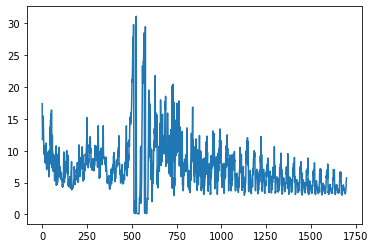

(1700,)


In [9]:
# from rpca.omwrpca import omwrpca
import numpy as np 
# from rpca.stoc_rpca import stoc_rpca
# from rpca.omwrpca_cp import omwrpca_cp
# from simulation.criteria import evaluate
import math
import matplotlib.pyplot as plt
from scipy.stats import f, chi2, zscore
import pandas as pd

fileName = "data/torque.xlsx"
torqueDataFrame = pd.read_excel(fileName)
# print(torqueDataFrame)      # 3440*2

torqueData = np.asarray(torqueDataFrame)
torqueData = torqueData[:,1]

# mydata = np.concatenate((np.random.randn(1000), np.random.randn(1000)+5))
# mydata = np.concatenate((mydata, np.random.randn(1000)-3))

mydata = torqueData[1500:3200]
plt.plot(mydata)
plt.show()

print(mydata.shape)
# mydata = np.resize(mydata, (1,len(mydata)))
# print(mydata.shape)

window_size = 52
X = np.zeros((window_size,len(mydata)-window_size+1))

for i in range(len(mydata)-window_size+1):
    X[:,i] = mydata[i:i+window_size]

# print(torqueData[:,1])

def normalize(X):
    X_mu = np.mean(X, axis=0).reshape((1, X.shape[1]))
    X_std = np.std(X, axis=0).reshape((1, X.shape[1]))
    Xs = (X-X_mu)/X_std

    return Xs, X_mu, X_std



In [10]:
X_norm, X_mu, X_std = normalize(X)

U, S, V = np.linalg.svd(X_norm)

cumper = 0.9
signifi=0.95

if S.shape[0] == 1:
    pc_number = 1
else:
    pc_number = 0
    var = 0
    while var < cumper*sum(S*S):
        var = var+S[pc_number]*S[pc_number]
        pc_number += 1

num_pc = pc_number

# training 
row=X_norm.shape[0]
        
#主元数选择
cov = (X.T @ X) /(len(X)-1)
U, S, V = np.linalg.svd(cov)
P=U[:,:num_pc]
T = X @ P  
lambdas=np.diag(S[:num_pc])



# 计算控制限
#         self.model['SPE_limit'], self.model['T2_limit'] = self.cal_controllimit(self.model)
T2_limit = num_pc* (row - 1) / (row- num_pc ) \
    * f.ppf(signifi, num_pc, row- num_pc)

# 计算SPE控制限
SPE = np.square(X).sum(axis=1) - np.square(T).sum(axis=1)
m, s = np.mean(SPE), np.var(SPE)
g, h = s / (2 * m), 2 * np.square(m) / s
SPE_limit = g * chi2.ppf(signifi, h)
      
    

In [11]:
X.T.shape

(1649, 52)

测试样本总数：1649

SPE统计量报警总数：112

T2统计量报警总数：122



/Users/davidw/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25511 (\N{CJK UNIFIED IDEOGRAPH-63A7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/davidw/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/davidw/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/davidw/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30417 (\N{CJK UNIFIED IDEOGRAPH-76D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/davidw/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6

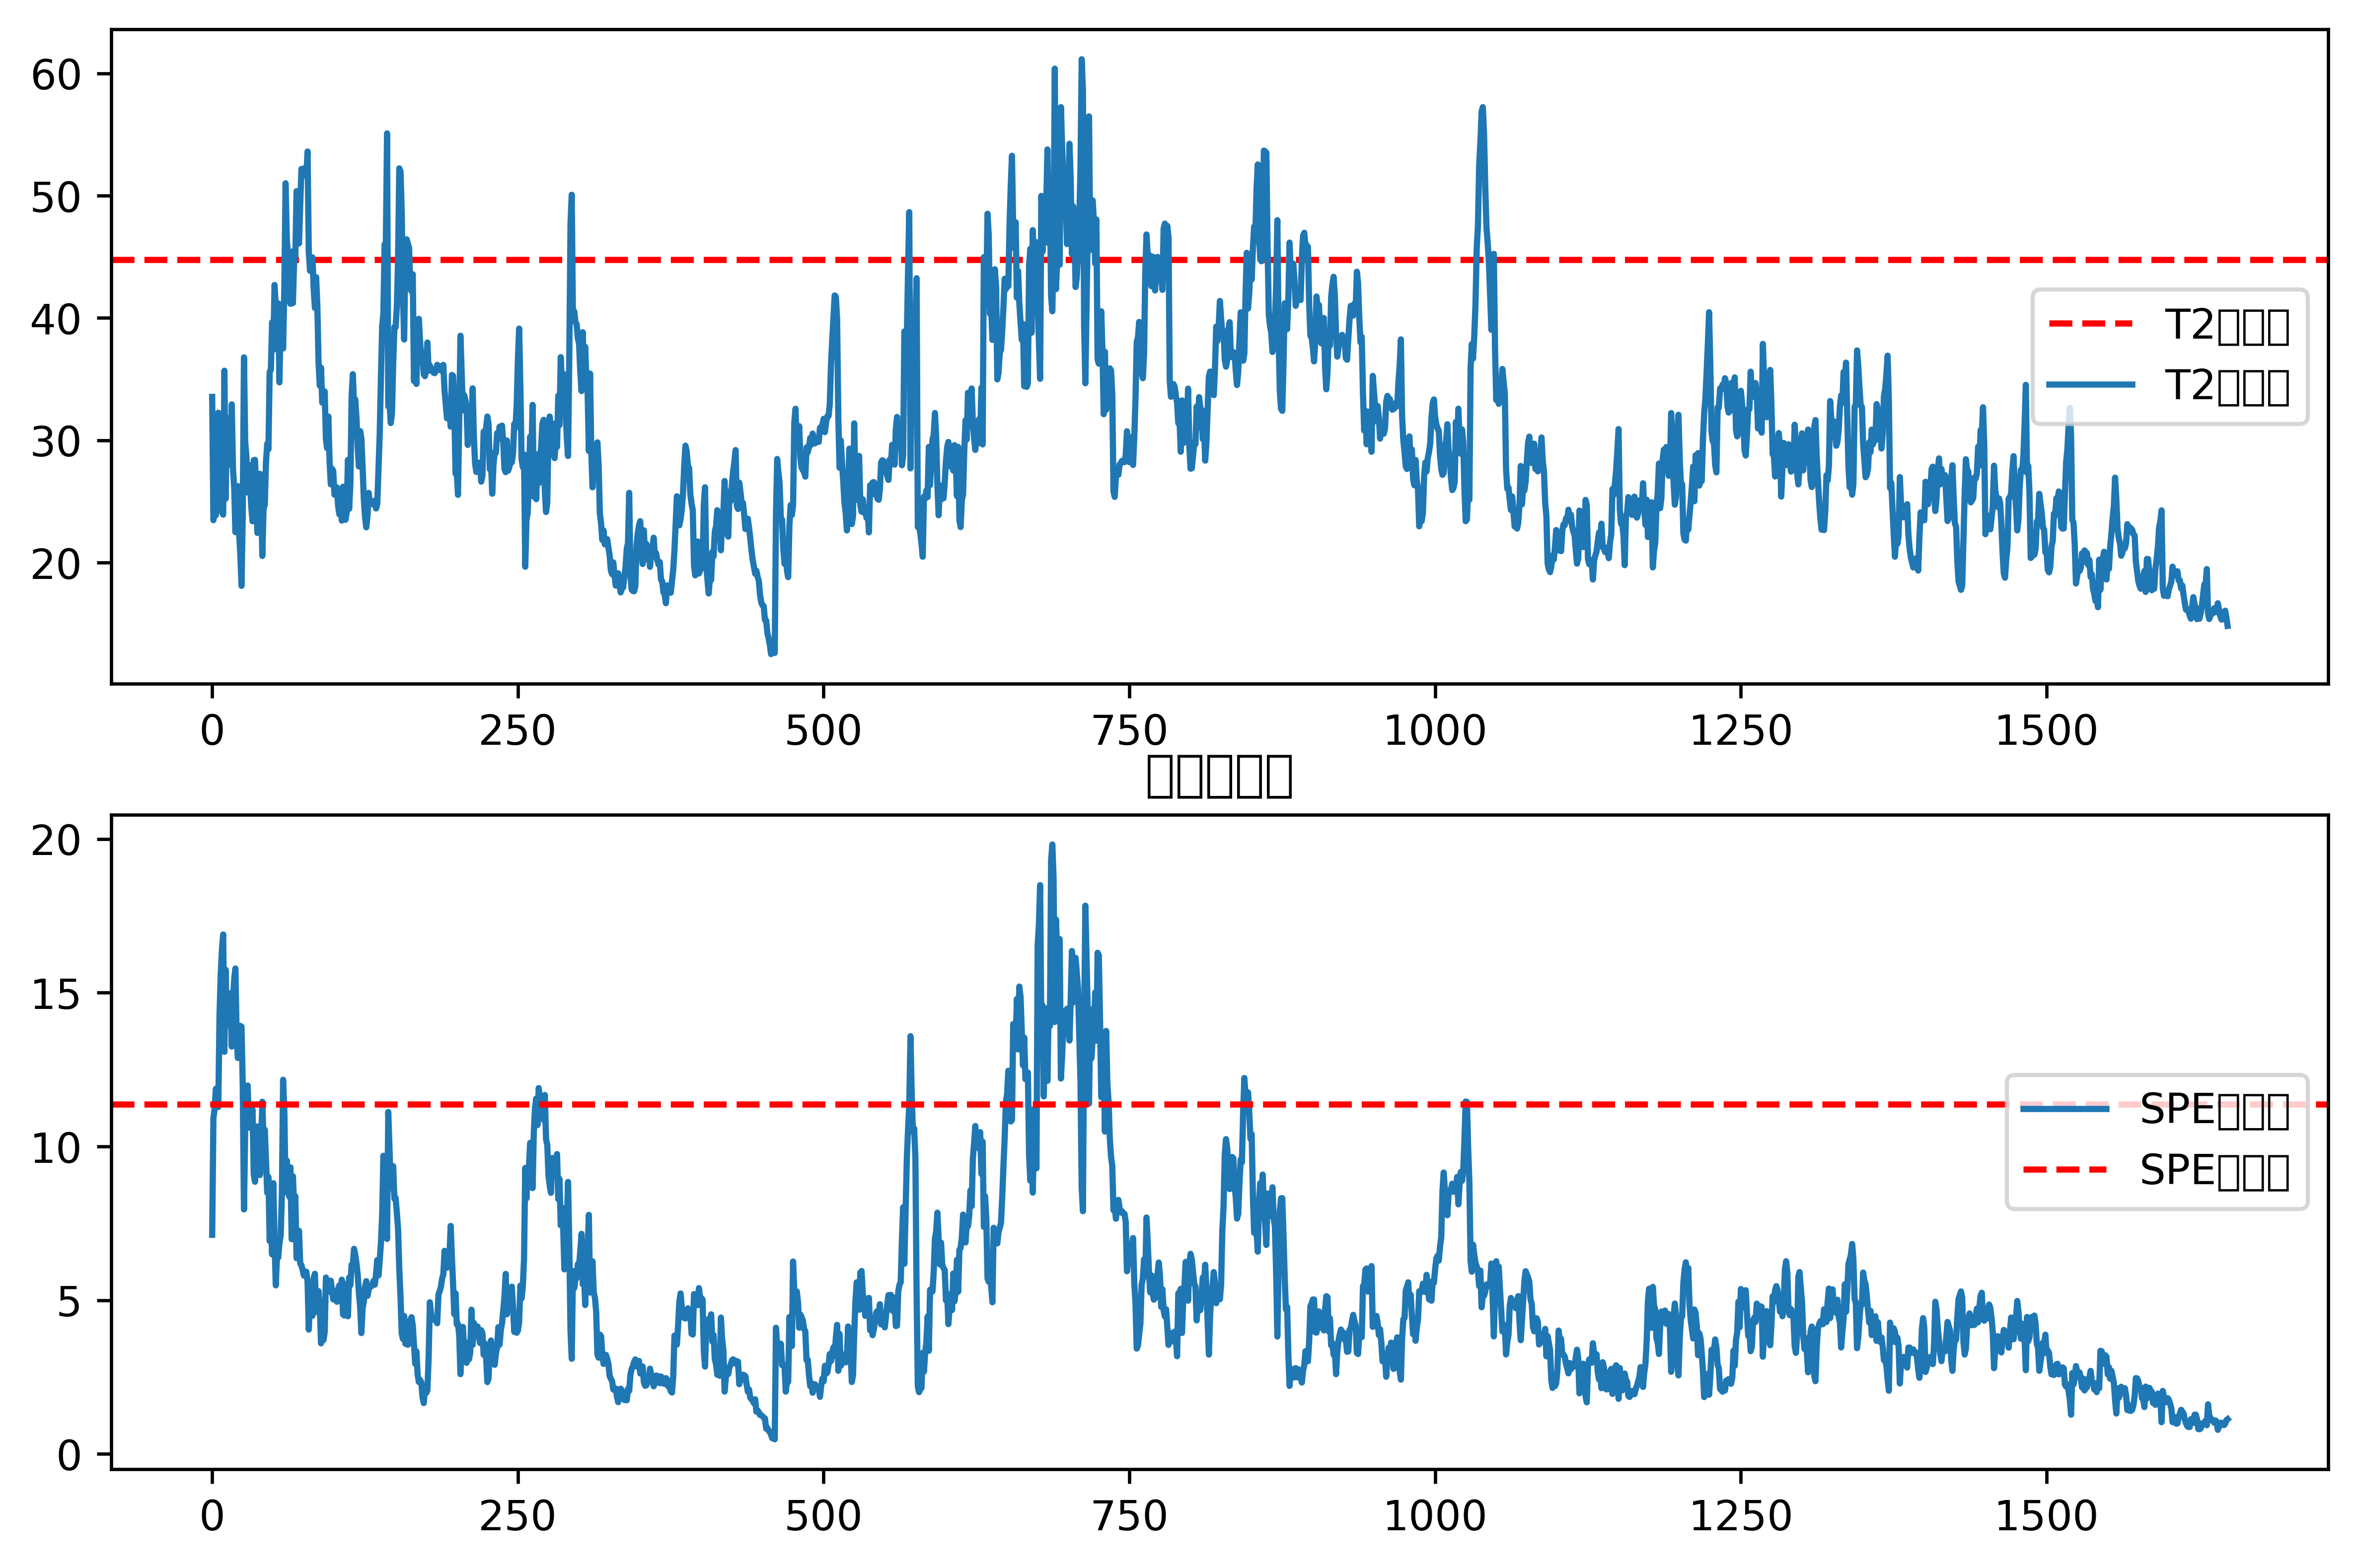

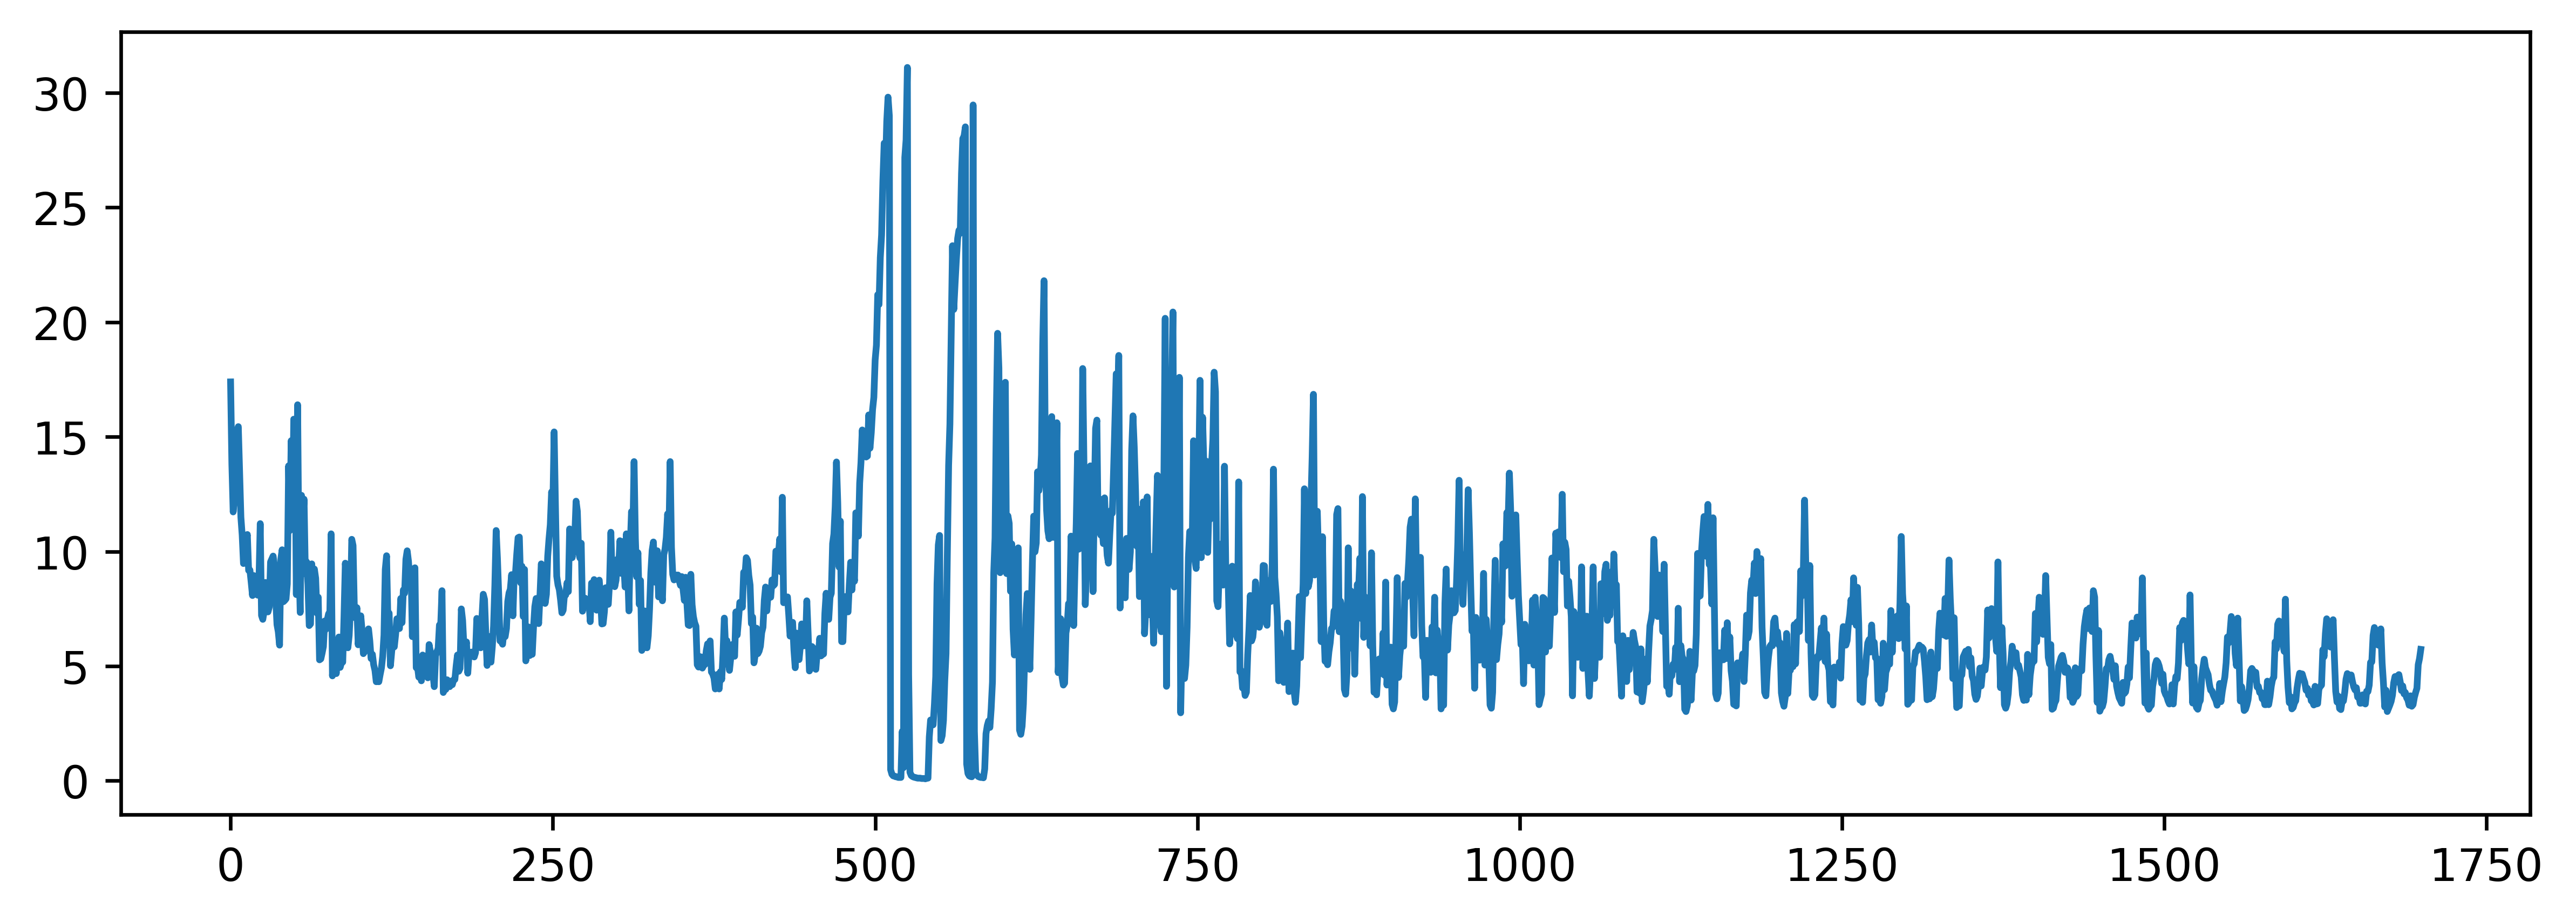

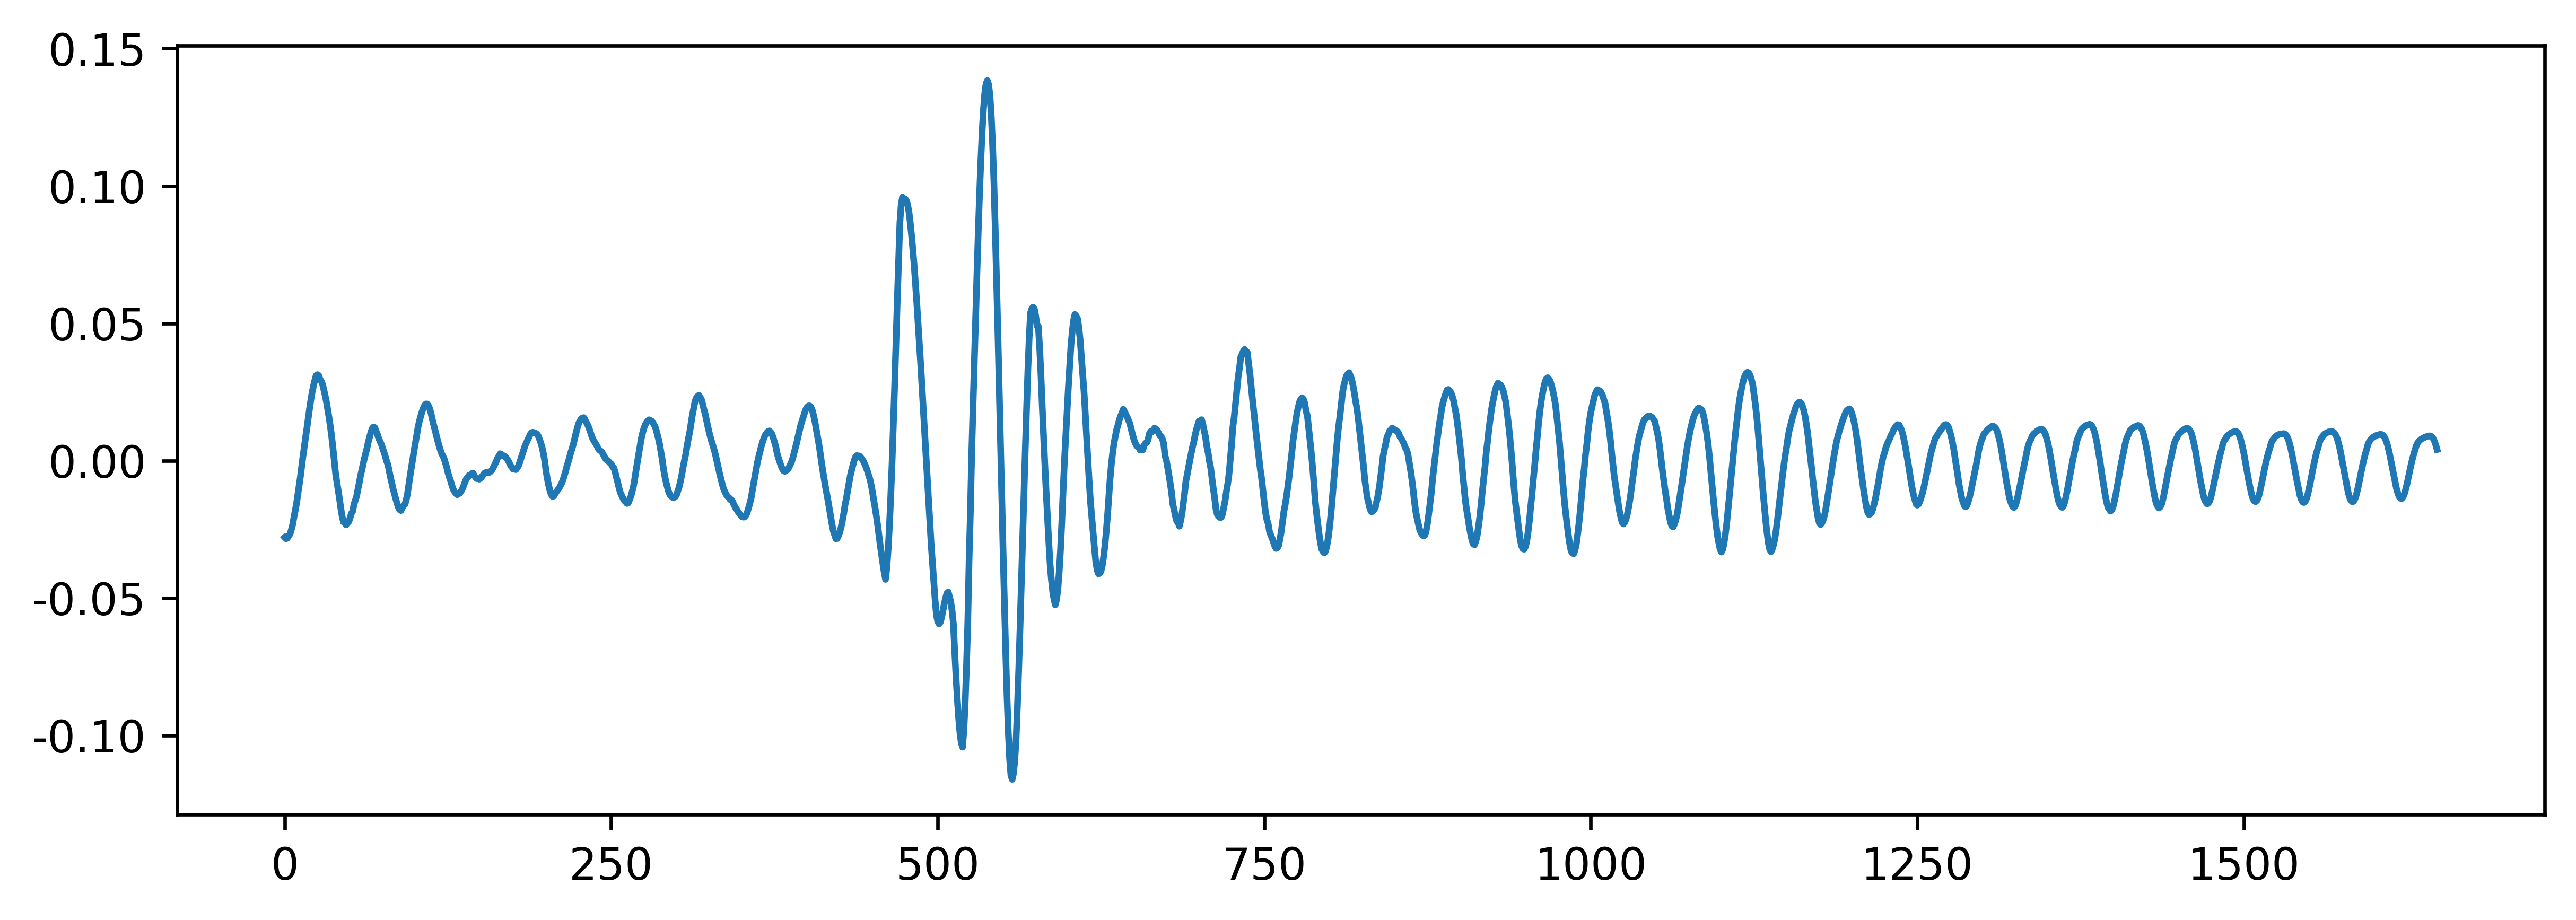

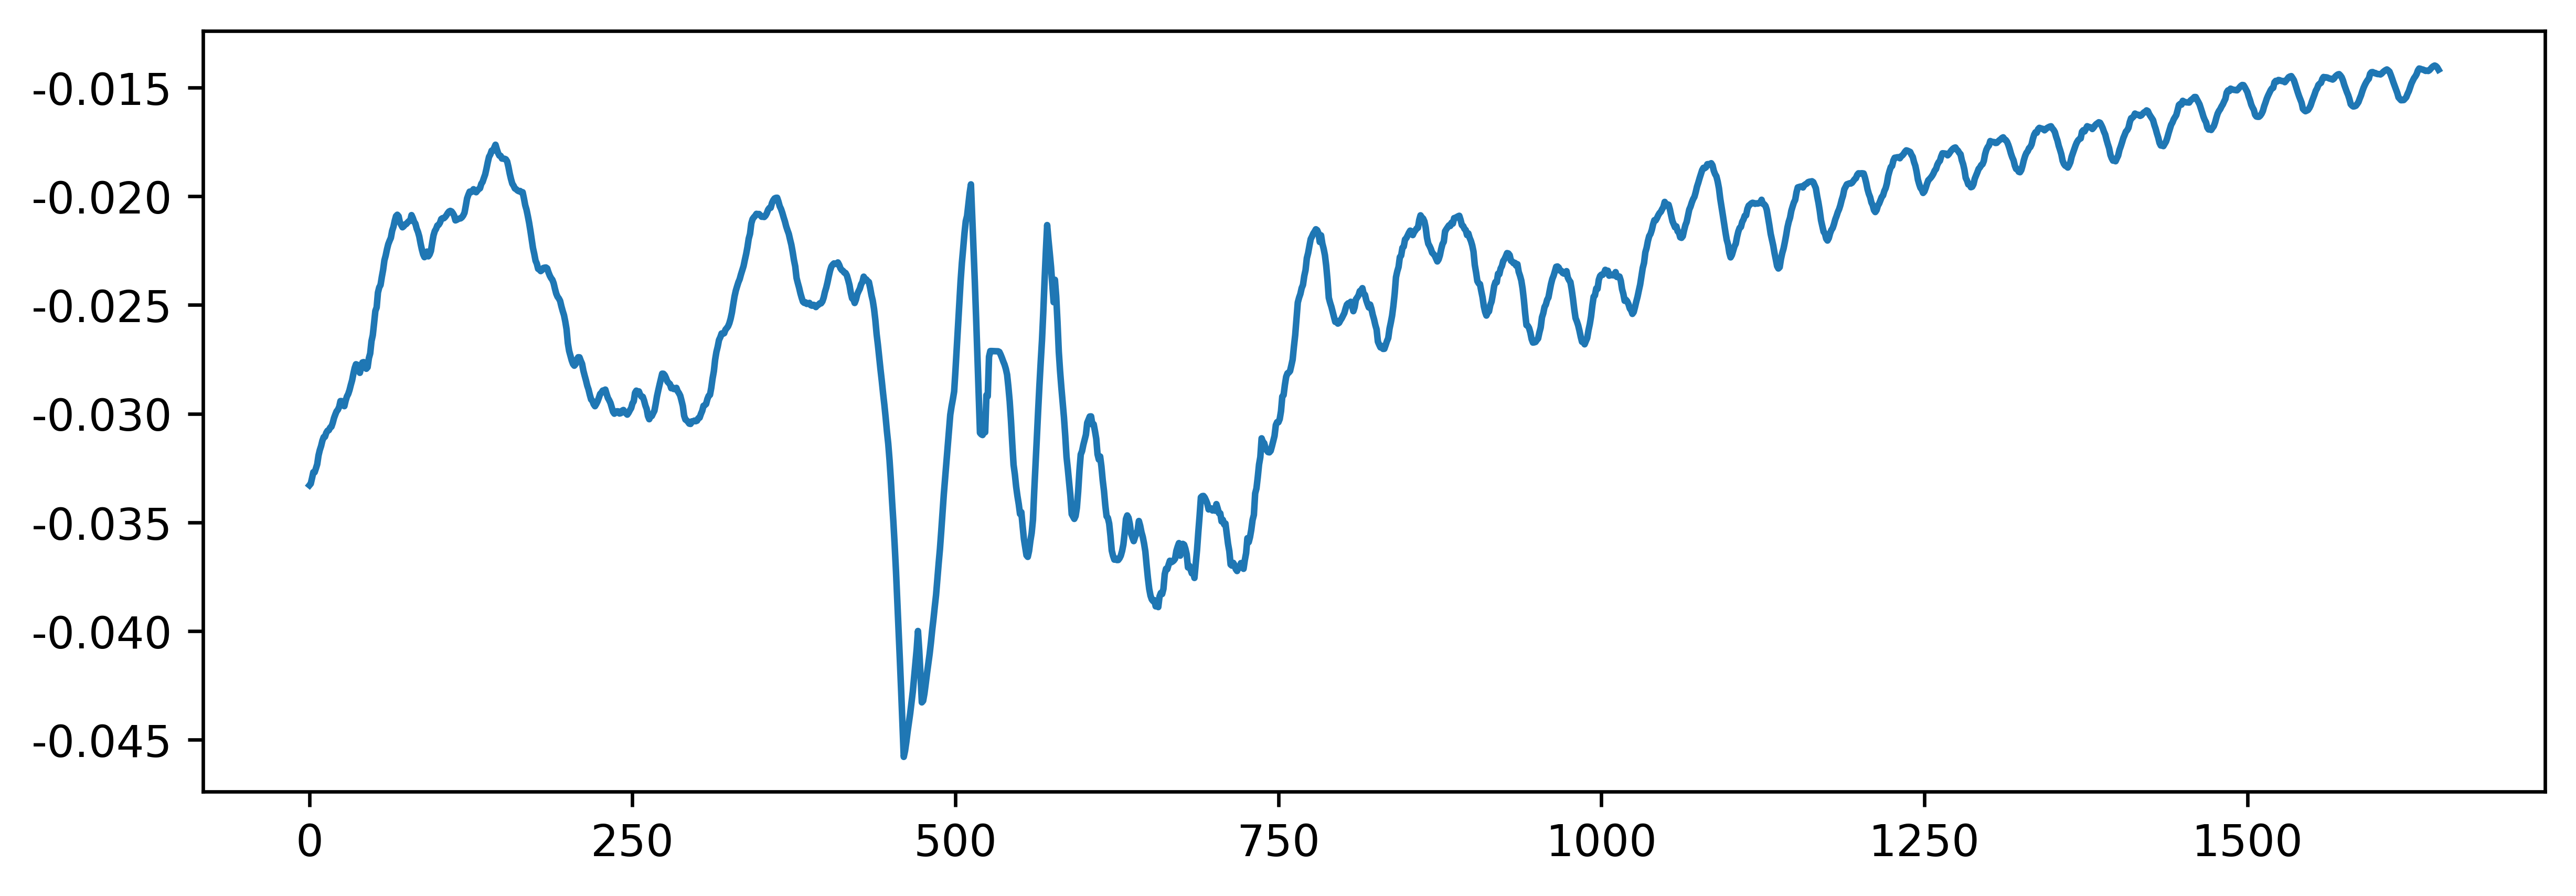

In [12]:
from pca_for_fault_diagnosis.PCA_FaultDection import PCA_FaultDection

model = PCA_FaultDection(cumper=0.90, signifi=0.95)

#数据标准化（若是标准化过后的数据则无需这一步）
[X_Train,X_test] = model.normalize(X, X)


#训练模型
model.train(X_Train.T)

#代入测试数据
testresult = model.test(X_test.T)

#检测结果可视化
model.visualization(model,testresult)

plt.figure(figsize=(9.6,3.2),dpi=600)
plt.plot(mydata)
plt.show()

plt.figure(figsize=(9.6,3.2),dpi=600)
plt.plot(U[:,1])
plt.show()
plt.figure(figsize=(9.6,3.2),dpi=600)
plt.plot(U[:,0])
plt.show()
